# Import libraries

In [1]:
from keras.layers import Input, Dense 
from keras.models import Model
from keras.datasets import mnist

import numpy as np 
import matplotlib.pyplot as plt

# Download MNIST data

In [2]:
(X_train, y_train), (x_test, y_test) = mnist.load_data()
print(X_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Data preprocessing

In [3]:
#Data normalization
X_train = X_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#Data reshaping
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

print(X_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Building Autoencoder 

In [8]:
InputModel = Input(shape=(784))

EncoderLayer = Dense(128, activation='relu')(InputModel)
EncoderLayer1 = Dense(64, activation='relu')(EncoderLayer)
EncoderLayer2 = Dense(32, activation='relu')(EncoderLayer1)

DecoderLayer1 = Dense(64, activation='relu')(EncoderLayer2)
DecoderLayer2 = Dense(128, activation='relu')(DecoderLayer1)
DecoderLayer3 = Dense(784, activation='sigmoid')(DecoderLayer2)

AutoEncoderModel = Model(InputModel, DecoderLayer3)
AutoEncoderModel.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_24 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_25 (Dense)             (None, 784)               1011

# Train the model 

In [11]:
AutoEncoderModel.compile(optimizer='adam', loss='binary_crossentropy')

history = AutoEncoderModel.fit(X_train, X_train,
                              epochs = 5,
                              batch_size = 254,
                              shuffle = True,
                              validation_data = (x_test, x_test))

#Make prediction to decode digits
DecodedDigits = AutoEncoderModel.predict(x_test)

Epoch 1/5
237/237 [==============================] - 1s 4ms/step - loss: 0.2340 - val_loss: 0.1599
Epoch 2/5
237/237 [==============================] - 1s 5ms/step - loss: 0.1459 - val_loss: 0.1334
Epoch 3/5
237/237 [==============================] - 1s 4ms/step - loss: 0.1283 - val_loss: 0.1207
Epoch 4/5
237/237 [==============================] - 1s 4ms/step - loss: 0.1191 - val_loss: 0.1147
Epoch 5/5
237/237 [==============================] - 1s 4ms/step - loss: 0.1141 - val_loss: 0.1105


# Validation chart

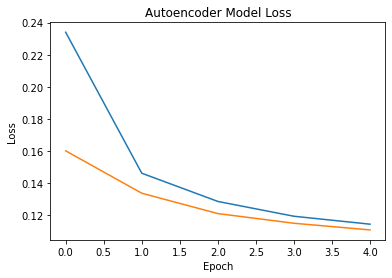

In [31]:
plt.title('Autoencoder Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Visualization

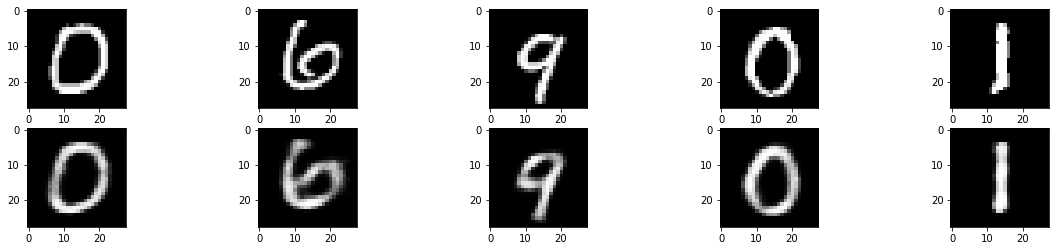

In [30]:
n = 5
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    
    #Input images
    plt.imshow(x_test[i+10].reshape(28, 28))
    ax = plt.subplot(2, n, i+1+n)
    
    #Images decoded by autoencoder
    plt.imshow(DecodedDigits[i+10].reshape(28, 28))